In [4]:
import pandas as pd
import wiggum as wg
import numpy
import seaborn as sns

In [5]:
labeled_df = wg.LabeledDataFrame('data/ldf_state_hit_rate_min_cols_COCTFLILMDMAMOMTNENCOHRISCTXVTWAWI')

100
1.96 ms ± 152 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
1.53 ms ± 183 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
The slowest run took 6.40 times longer than the fastest. This could mean that an intermediate result is being cached.
6.6 ms ± 5.97 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
4.58 ms ± 782 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
160 ms ± 24.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
223 ms ± 7.17 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
4.13 ms ± 165 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
3.66 ms ± 40.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
4.1 ms ± 112 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
3.8 ms ± 324 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
       times     data function  trial version
0   0.001870  traffic      cct      1      v1
1   0.001936  traffic      cct      2      v1
2   0.001761  traffic      cc

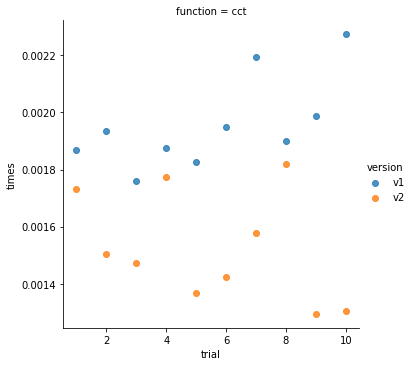

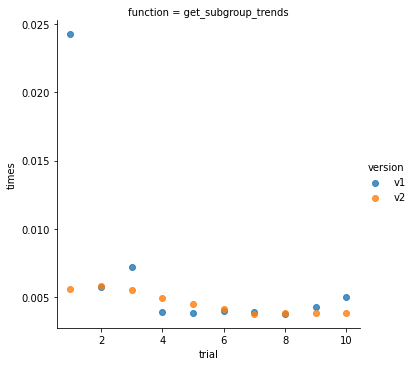

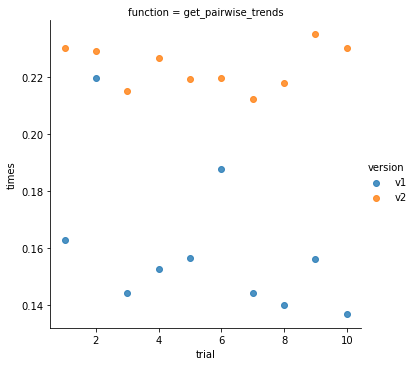

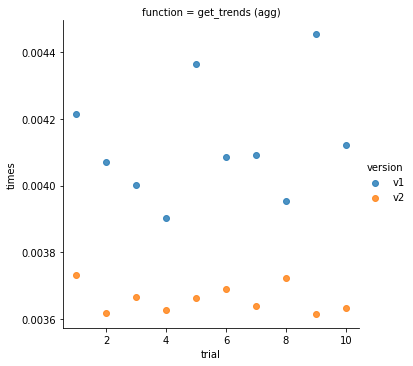

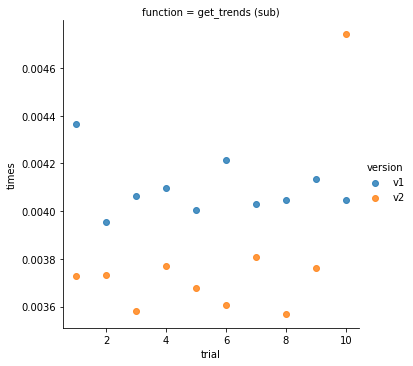

In [6]:
def append_fun(func, j, function):
    i=0
    while i<j:
        function.append(func)
        i+=1
    return function
        
def get_tests(labeled_df, data_name):
    
    times=[]
    function_names=['cct', 'get_subgroup_trends', 'get_pairwise_trends', 'get_trends (agg)', 'get_trends (sub)']
    result_df=pd.DataFrame(columns=['times', 'data', 'function'])
    
    # setting function column
    function=[]
    for ele in function_names:
        append_fun(ele, 20, function)
    print(len(function))
    # setting version column    
    versions=['v1', 'v2']
    version=[]
    i=0
    while i<5:
        j=0
        while j<10:
            version.append(versions[0])
            j+=1
        j=0
        while j<10:
            version.append(versions[1])
            j+=1
        i+=1

    
    # set trends
    pearson = wg.All_Pearson()
    pearson.get_trend_vars(labeled_df)
    pearson.regression_vars
    
    pearson_2 = wg.trends.All_Pearson_V2()
    pearson_2.get_trend_vars(labeled_df)
    pearson_2.regression_vars
    
    # run tests
    fun=%timeit -or10 -n100 pearson.compute_correlation_table(labeled_df.df, 'agg_trend')
    times.append(fun.timings)
    
    fun=%timeit -or10 -n100 pearson.compute_correlation_table_V2(labeled_df.df)
    times.append(fun.timings)
    
    fun = %timeit -or10 -n10 labeled_df.get_subgroup_trends_1lev([pearson])
    times.append(fun.timings)
    
    fun = %timeit -or10 -n10 labeled_df.get_subgroup_trends_1lev([pearson_2])
    times.append(fun.timings)
    
    fun = %timeit -or10 -n1 labeled_df.get_pairwise_trends_1lev([pearson])
    times.append(fun.timings)
    
    fun=%timeit -or10 -n1 labeled_df.get_pairwise_trends_1lev([pearson_2])
    times.append(fun.timings)
    
    fun=%timeit -or10 -n100 pearson.get_trends(labeled_df.df, 'agg_trend')
    times.append(fun.timings)
    
    fun=%timeit -or10 -n100 pearson_2.get_trends(labeled_df.df, 'agg_trend')
    times.append(fun.timings)
    
    fun=%timeit -or10 -n100 pearson.get_trends(labeled_df.df, 'subgroup_trend')
    times.append(fun.timings)
    
    fun=%timeit -or10 -n100 pearson_2.get_trends(labeled_df.df, 'subgroup_trend')
    times.append(fun.timings)
    
    timed = [ele for lis in times for ele in lis]
    
    trial=[]
    i=0
    while i<10:
        j=1
        while j<=10:
            trial.append(j)
            j+=1
        i+=1
    
    result_df['times']=timed
    result_df['function']=function
    result_df['data']=str(data_name)
    result_df['trial']=trial
    result_df['version']=version
    
    return result_df

def graph_tests(labeled_df):
    
    result=get_tests(labeled_df, 'traffic')
    uni=result['function'].unique()
    for ele in uni:
        is_fun=result['function']==ele
        df=result[is_fun]
        print(df)
        sns.lmplot(x='trial', y='times', data=df, hue='version', col='function', fit_reg=False)
graph_tests(labeled_df)